In [168]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("C:/Users/jinwo/Downloads/BP_data.csv")

In [170]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [172]:
print(data.isnull().sum())  

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [174]:
# 1. Genetic_Pedigree_Coefficient: 평균으로 대체
data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean(), inplace=True)

# 2. Pregnancy: 0으로 대체
data['Pregnancy'].fillna(0, inplace=True)

# 3. alcohol_consumption_per_day: 평균으로 대체
data['alcohol_consumption_per_day'].fillna(data['alcohol_consumption_per_day'].mean(), inplace=True)

C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\3262877740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\3262877740.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [176]:
print(data.isnull().sum())  

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


In [178]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
mpl.rcParams['axes.unicode_minus'] = False

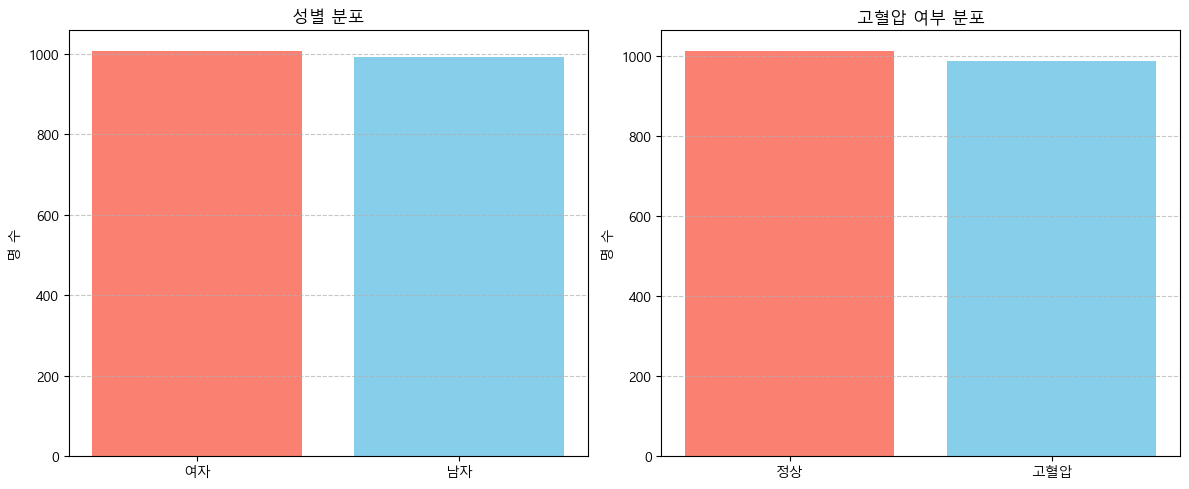

In [180]:
# 성별 데이터
sex_counts = data['Sex'].value_counts().sort_index()
sex_labels = ['여자', '남자']
sex_colors = ['salmon', 'skyblue']  # 0=여자, 1=남자

# 고혈압 여부 데이터
bp_counts = data['Blood_Pressure_Abnormality'].value_counts().sort_index()
bp_labels = ['정상', '고혈압']
bp_colors = ['salmon', 'skyblue']  # 0=정상, 1=고혈압

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 성별 그래프
axs[0].bar(sex_labels, sex_counts.values, color=sex_colors)
axs[0].set_title("성별 분포")
axs[0].set_ylabel("명 수")
axs[0].yaxis.grid(True, linestyle='--', alpha=0.7)  # y축 보조선 추가

# 고혈압 여부 그래프
axs[1].bar(bp_labels, bp_counts.values, color=bp_colors)
axs[1].set_title("고혈압 여부 분포")
axs[1].set_ylabel("명 수")
axs[1].yaxis.grid(True, linestyle='--', alpha=0.7)  # y축 보조선 추가

plt.tight_layout()
plt.show()


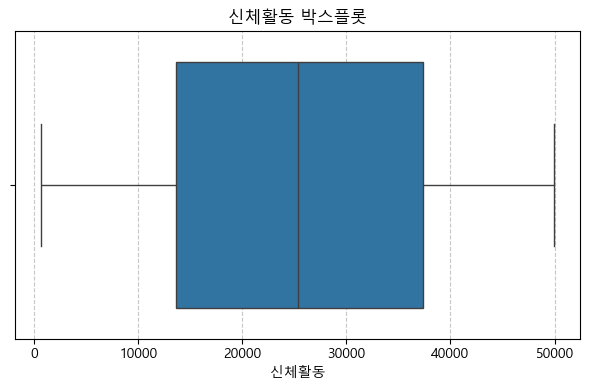

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot 그리기
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Physical_activity'])
plt.title('신체활동 박스플롯')
plt.xlabel('신체활동')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # 보조선 추가

plt.tight_layout()
plt.show()

C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\3626790199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Sex_label', y='Physical_activity', palette=['salmon', 'lightblue'])


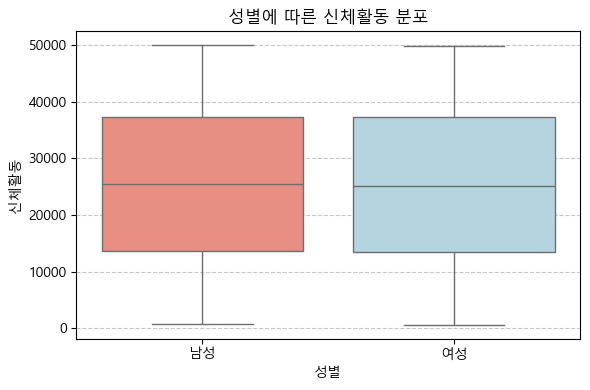

In [182]:
# 성별 라벨 변환 
data['Sex_label'] = data['Sex'].map({0: '여성', 1: '남성'})

# Boxplot 그리기
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Sex_label', y='Physical_activity', palette=['salmon', 'lightblue'])

plt.title('성별에 따른 신체활동 분포')
plt.xlabel('성별')
plt.ylabel('신체활동')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # 보조선 추가
plt.tight_layout()
plt.show()

C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\1165643803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Sex_label', y='Physical_activity', palette=['salmon', 'lightblue'])


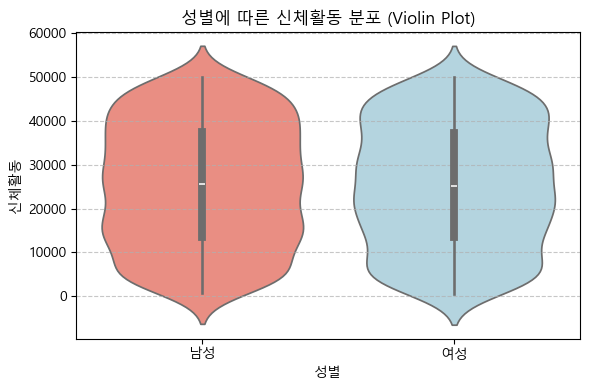

In [184]:
# 성별 라벨
data['Sex_label'] = data['Sex'].map({0: '여성', 1: '남성'})

# Violin Plot 그리기
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='Sex_label', y='Physical_activity', palette=['salmon', 'lightblue'])

plt.title('성별에 따른 신체활동 분포 (Violin Plot)')
plt.xlabel('성별')
plt.ylabel('신체활동')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # 보조선 추가
plt.tight_layout()
plt.show()

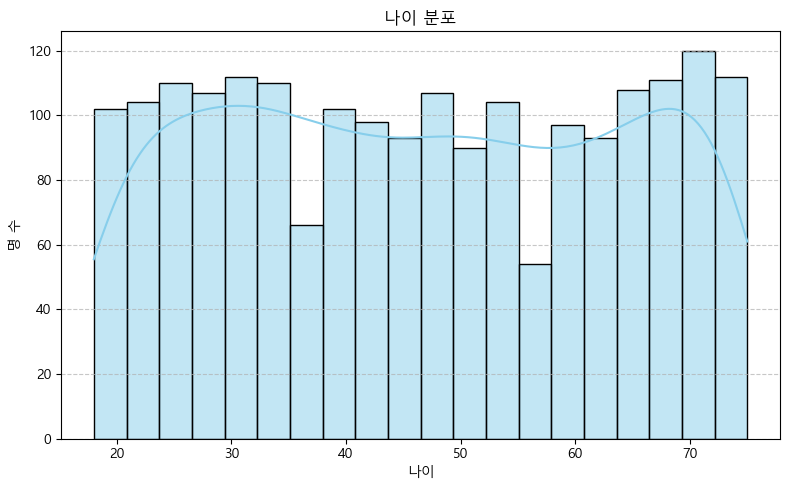

In [185]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue')

plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('명 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 수평 보조선 추가

plt.tight_layout()
plt.show()


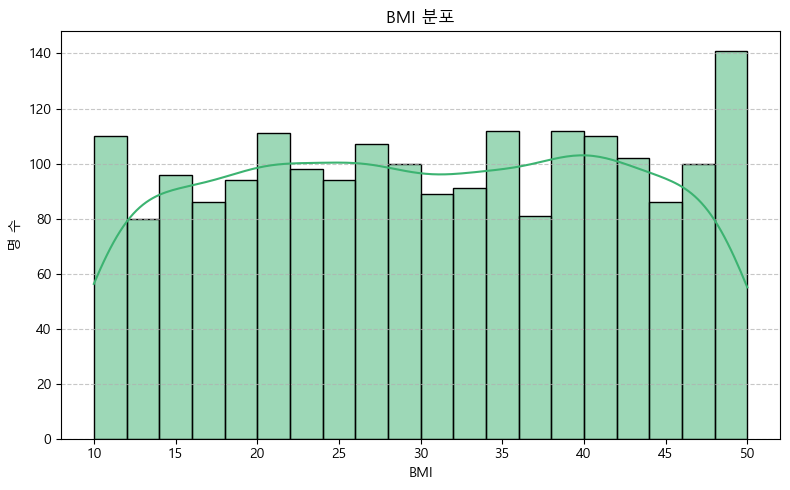

In [187]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='BMI', bins=20, kde=True, color='mediumseagreen')

plt.title('BMI 분포')
plt.xlabel('BMI')
plt.ylabel('명 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 수평 보조선 추가

plt.tight_layout()
plt.show()


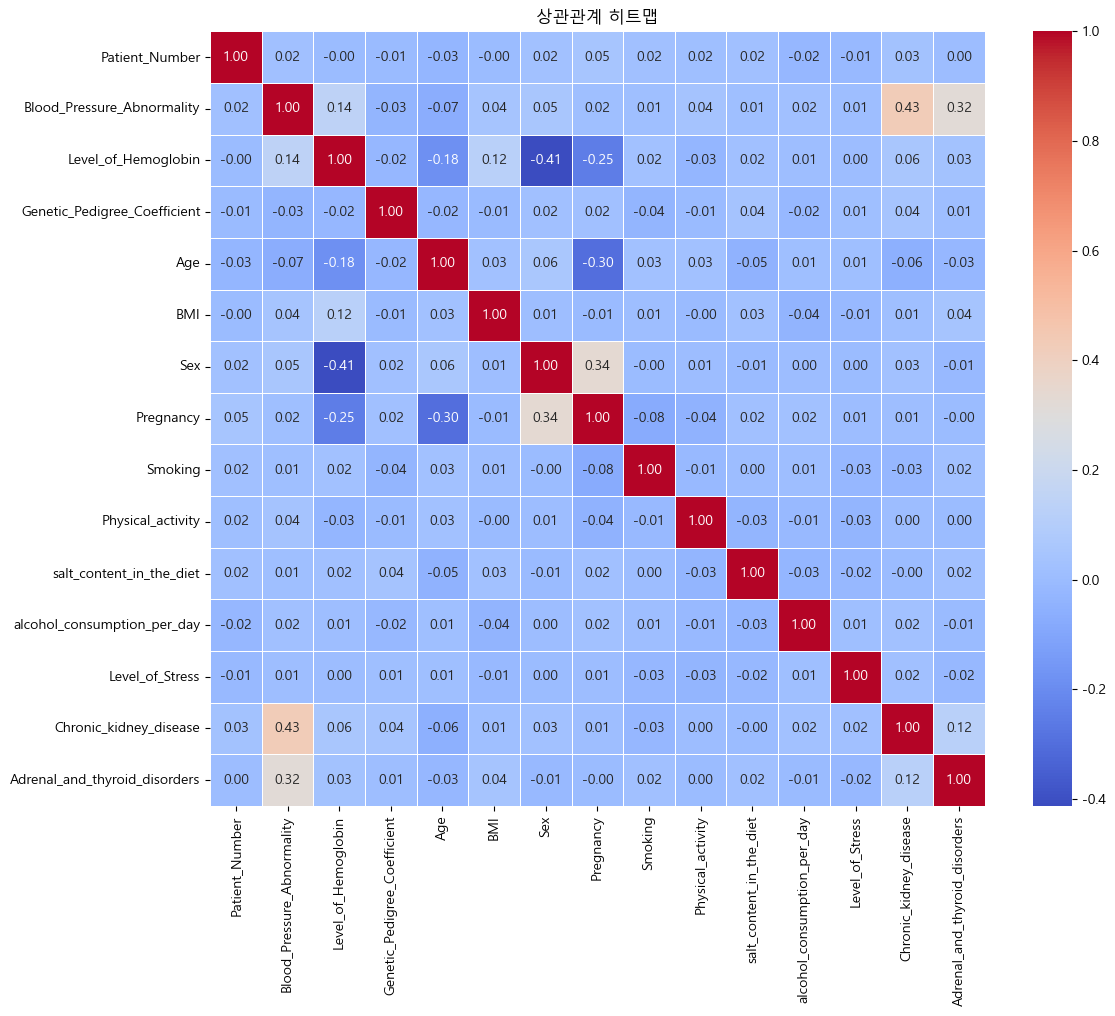

In [188]:
# 수치형 변수만 추출
numeric_data = data.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corr_matrix = numeric_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar=True)

plt.title('상관관계 히트맵')
plt.tight_layout()
plt.show()


C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\2628475062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Sex_label', y='Level_of_Stress', palette=['salmon', 'lightblue'])


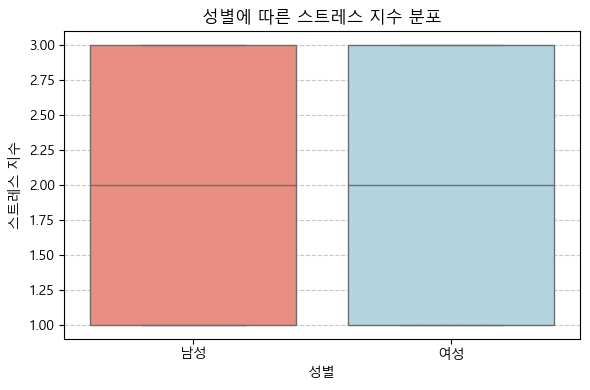

In [190]:
# 라벨 변환 
data['Sex_label'] = data['Sex'].map({0: '여성', 1: '남성'})

# 박스플롯 그리기
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Sex_label', y='Level_of_Stress', palette=['salmon', 'lightblue'])

plt.title('성별에 따른 스트레스 지수 분포')
plt.xlabel('성별')
plt.ylabel('스트레스 지수')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 수평 보조선 추가

plt.tight_layout()
plt.show()


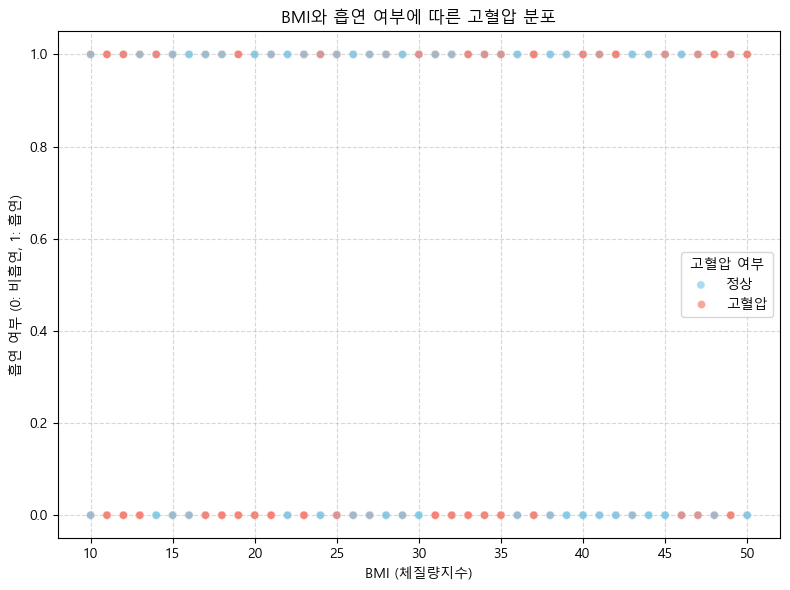

In [191]:
plt.figure(figsize=(8, 6))

# 산점도 그리기
sns.scatterplot(data=data, x='BMI', y='Smoking', hue='Blood_Pressure_Abnormality',
                palette={0: 'salmon', 1: 'skyblue'}, alpha=0.7)

# 제목과 축 라벨 한글로 설정
plt.title('BMI와 흡연 여부에 따른 고혈압 분포')
plt.xlabel('BMI (체질량지수)')
plt.ylabel('흡연 여부 (0: 비흡연, 1: 흡연)')
plt.legend(title='고혈압 여부', labels=['정상', '고혈압'])

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [192]:
data = pd.read_csv("C:/Users/jinwo/Downloads/BP_data.csv")
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [194]:
# 1. Genetic_Pedigree_Coefficient: 평균으로 대체
data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean(), inplace=True)

# 2. Pregnancy: 0으로 대체
data['Pregnancy'].fillna(0, inplace=True)

# 3. alcohol_consumption_per_day: 평균으로 대체
data['alcohol_consumption_per_day'].fillna(data['alcohol_consumption_per_day'].mean(), inplace=True)

C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\3262877740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
C:\Users\jinwo\AppData\Local\Temp\ipykernel_40972\3262877740.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [195]:
# 데이터,타겟 분리
X = data.drop(['Blood_Pressure_Abnormality', 'Patient_Number'], axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [196]:
# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 13), (400, 13), (1600,), (400,))

In [199]:
# 넘파이 배열을 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [200]:
# 훈련 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 테스트 데이터셋 및 데이터로더 생성
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [201]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

In [203]:
# 이진 분류 모델 정의
class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 64)     # 입력층 → 은닉층1
        self.fc2 = nn.Linear(64, 32)     # 은닉층1 → 은닉층2
        self.fc3 = nn.Linear(32, 2)      # 은닉층2 → 출력층 (2클래스)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = DiabetesClassifier()

In [204]:
# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [205]:
train_losses = []         # 에폭별 훈련 손실 저장
test_accuracies = []      # 에폭별 테스트 정확도 저장

num_epochs = 20

for epoch in range(num_epochs):
    model.train()         # 학습 모드 설정 (드롭아웃, 배치정규화 등 활성)
    running_loss = 0.0    # 에폭 내 누적 손실

    # 배치 단위로 훈련
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()             # 이전 누적된 gradient 초기화
        outputs = model(inputs)           # 순전파
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward()                   # 역전파: gradient 계산
        optimizer.step()                  # 가중치 업데이트

        running_loss += loss.item()       # 손실 값 누적

    # 에폭당 평균 손실 저장
    train_losses.append(running_loss / len(train_dataloader))

    # ------------------- 평가 -------------------
    model.eval()          # 평가 모드 (드롭아웃, 배치정규화 비활성화)
    correct = 0
    total = 0

    with torch.no_grad():  # 평가 시 gradient 계산 비활성화 (성능 ↑, 메모리 ↓)
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # 예측 결과 클래스 추출
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # 정확히 예측한 수 계산

    accuracy = 100 * correct / total  # 정확도 계산
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6591, Accuracy: 68.50%
Epoch 2/20, Loss: 0.5689, Accuracy: 73.75%
Epoch 3/20, Loss: 0.5122, Accuracy: 76.50%
Epoch 4/20, Loss: 0.4801, Accuracy: 79.75%
Epoch 5/20, Loss: 0.4494, Accuracy: 80.00%
Epoch 6/20, Loss: 0.4129, Accuracy: 82.50%
Epoch 7/20, Loss: 0.3784, Accuracy: 84.75%
Epoch 8/20, Loss: 0.3502, Accuracy: 87.00%
Epoch 9/20, Loss: 0.3265, Accuracy: 87.75%
Epoch 10/20, Loss: 0.3081, Accuracy: 89.50%
Epoch 11/20, Loss: 0.2985, Accuracy: 88.75%
Epoch 12/20, Loss: 0.2839, Accuracy: 90.25%
Epoch 13/20, Loss: 0.2736, Accuracy: 90.75%
Epoch 14/20, Loss: 0.2714, Accuracy: 91.50%
Epoch 15/20, Loss: 0.2613, Accuracy: 90.50%
Epoch 16/20, Loss: 0.2596, Accuracy: 90.50%
Epoch 17/20, Loss: 0.2557, Accuracy: 90.50%
Epoch 18/20, Loss: 0.2500, Accuracy: 90.50%
Epoch 19/20, Loss: 0.2448, Accuracy: 90.75%
Epoch 20/20, Loss: 0.2395, Accuracy: 91.25%
Training complete.


In [206]:
model.eval()  # 평가 모드 전환

all_labels = []       # 전체 정답 레이블
all_predictions = []  # 전체 예측 결과

# 테스트셋 전체에 대해 예측 수행
with torch.no_grad():  # 기울기 계산 비활성화로 속도 향상
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  # 가장 확률 높은 클래스 선택
        all_labels.extend(labels.cpu().numpy())       # 정답 추가
        all_predictions.extend(predicted.cpu().numpy())  # 예측값 추가

# 리스트 → 넘파이 배열 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 혼동행렬 및 평가 지표 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)

# f1-score: 정밀도와 재현율의 조화 평균
f1 = f1_score(all_labels, all_predictions, average='weighted')

# 정밀도: 예측한 것 중 실제로 맞은 비율
precision = precision_score(all_labels, all_predictions, average='weighted')

# 재현율: 실제 정답 중 예측이 맞은 비율
recall = recall_score(all_labels, all_predictions, average='weighted')

# 특이도 계산 (클래스별 평균)
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])  # 진짜 음성
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]  # 거짓 양성
    specificity.append(tn / (tn + fp))

# 결과 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')


Confusion Matrix:
[[190  18]
 [ 17 175]]
F1 Score: 0.91
Precision: 0.91
Recall: 0.91
Specificity: 0.91


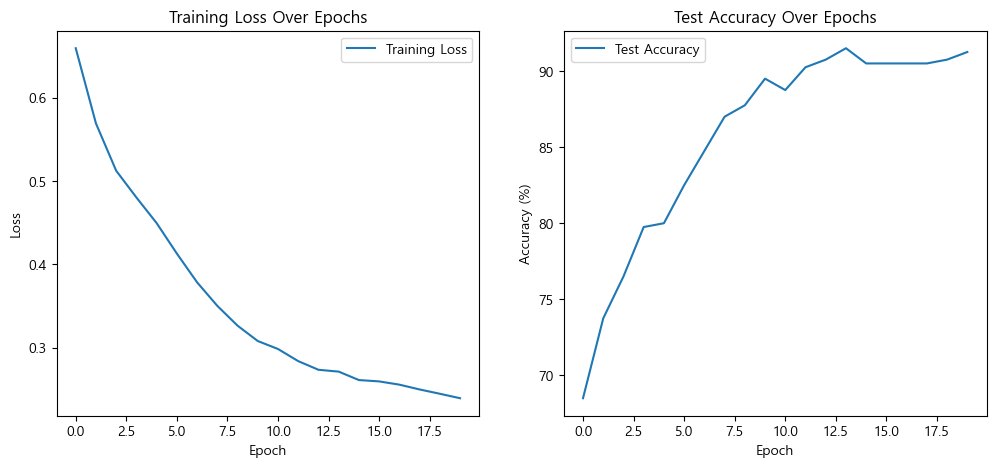

In [207]:
# 학습 손실과 테스트 정확도 시각화
plt.figure(figsize=(12, 5))  # 전체 그래프 크기 설정

# 왼쪽: 학습 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')  # 손실 값 plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')  # 제목
plt.legend()

# 오른쪽: 테스트 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')  # 정확도 값 plot
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')  # 제목
plt.legend()
